In [33]:
# All imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

## Data preparation

In [3]:
data = pd.read_csv('Data/1429_1.csv')
print("Shape: ",data.shape)
print("Columns: ", data.columns)
data.head(3)

('Shape: ', (34660, 21))
('Columns: ', Index([u'id', u'name', u'asins', u'brand', u'categories', u'keys',
       u'manufacturer', u'reviews.date', u'reviews.dateAdded',
       u'reviews.dateSeen', u'reviews.didPurchase', u'reviews.doRecommend',
       u'reviews.id', u'reviews.numHelpful', u'reviews.rating',
       u'reviews.sourceURLs', u'reviews.text', u'reviews.title',
       u'reviews.userCity', u'reviews.userProvince', u'reviews.username'],
      dtype='object'))


/home/saileshg/sailspace/dev/pyenv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [4]:
# Simply grouped by categories & rating and viewing their respective counts - not useful

data_groupedByCategory = data.groupby(['categories'])
# data_groupedByCategory.agg(np.size)

In [5]:
data_subsetted_features = data[['reviews.title','reviews.text','reviews.rating']]
data_subsetted_clean = data_subsetted_features.dropna(axis=0,how='any')
data_subsetted_clean.shape

(34621, 3)

In [6]:
data_subsetted_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34621 entries, 0 to 34659
Data columns (total 3 columns):
reviews.title     34621 non-null object
reviews.text      34621 non-null object
reviews.rating    34621 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [7]:
data_subsetted_clean.isnull().sum()

reviews.title     0
reviews.text      0
reviews.rating    0
dtype: int64

/home/saileshg/sailspace/dev/pyenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


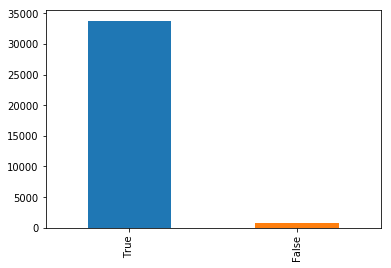

In [8]:
#Adding new feature - sentiment
data_subsetted_clean['sentiment'] = data_subsetted_clean['reviews.rating'] >= 3
data_subsetted_clean.sentiment.replace([True, False],['positive','negative']) # doesn't work ?

data_subsetted_clean.sentiment.value_counts().plot.bar()
plt.show()

## Text cleanup

In [9]:
def do_basic_cleanup(text):
    return text.strip().lower()
     

# print(do_basic_cleanup("hello! my dear wrong number.."))
data_subsetted_clean['review_summary'] = data_subsetted_clean['reviews.text'].apply(do_basic_cleanup)
data_subsetted_clean['tokens'] = data_subsetted_clean['review_summary'].apply(str.split)
data_subsetted_clean.head(3)

/home/saileshg/sailspace/dev/pyenv/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/saileshg/sailspace/dev/pyenv/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,reviews.title,reviews.text,reviews.rating,sentiment,review_summary,tokens
0,Kindle,This product so far has not disappointed. My c...,5.0,True,this product so far has not disappointed. my c...,"[this, product, so, far, has, not, disappointe..."
1,very fast,great for beginner or experienced person. Boug...,5.0,True,great for beginner or experienced person. boug...,"[great, for, beginner, or, experienced, person..."
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,True,inexpensive tablet for him to use and learn on...,"[inexpensive, tablet, for, him, to, use, and, ..."


## Modelling

In [21]:
stopwords = set(STOPWORDS)
stopwords.remove('not')

# TFIDF vectorization
count_vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=[1,3], min_df=2)
tfidf_transformer = TfidfTransformer()

X = data_subsetted_clean
X.drop('sentiment',axis=1)
# X.columns
y = data_subsetted_clean.sentiment

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.shape

X_train_count_vectors = count_vectorizer.fit_transform(X_train.review_summary)
X_train_tfidf_vectors = tfidf_transformer.fit_transform(X_train_count_vectors)

X_test_count_vectors = count_vectorizer.transform(X_test.review_summary)
X_test_tfidf_vectors = tfidf_transformer.transform(X_test_count_vectors)

In [35]:
model = MultinomialNB()

model.fit(X_train_tfidf_vectors,X_train.sentiment)
X_test['predicted_sentiment'] = model.predict(X_test_tfidf_vectors)
print('Multinomial Naive Bayes accuracy: {}'.format(model.score(X_test_tfidf_vectors,X_test.sentiment)))

X_test[X_test['reviews.rating'] < 3] # Poor Precision!

Multinomial Naive Bayes accuracy: 0.976895306859


/home/saileshg/sailspace/dev/pyenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,reviews.title,reviews.text,reviews.rating,sentiment,review_summary,tokens,prediction,predicted_sentiment
11789,Prefer using previous kindle,This version of kindle was not very impressive...,2.0,False,this version of kindle was not very impressive...,"[this, version, of, kindle, was, not, very, im...",True,True
27504,Wasn't impressed,It wouldn't connect with any of my smart home ...,1.0,False,it wouldn't connect with any of my smart home ...,"[it, wouldn't, connect, with, any, of, my, sma...",True,True
10354,lacking,Sold it on Craigslist the day I bought itWhat ...,1.0,False,sold it on craigslist the day i bought itwhat ...,"[sold, it, on, craigslist, the, day, i, bought...",True,True
27661,Not all what I expected. Siri answers better.,Must have Amazon paid service to play music fr...,2.0,False,must have amazon paid service to play music fr...,"[must, have, amazon, paid, service, to, play, ...",True,True
13213,Not what i thought from reading the reviews,I was not satisfied with my purchase but for t...,1.0,False,i was not satisfied with my purchase but for t...,"[i, was, not, satisfied, with, my, purchase, b...",True,True
29472,"terrible product,bad voice quality",the speaker voice quality is terrible compare ...,1.0,False,the speaker voice quality is terrible compare ...,"[the, speaker, voice, quality, is, terrible, c...",True,True
14339,"Light wieght, camera, good price, but not for me",Could not download my books at home. Three vis...,1.0,False,could not download my books at home. three vis...,"[could, not, download, my, books, at, home., t...",True,True
30407,lasted less than a yr,i love the service when it works. several time...,2.0,False,i love the service when it works. several time...,"[i, love, the, service, when, it, works., seve...",True,True
3307,Too expensive,Way too expensive,2.0,False,way too expensive,"[way, too, expensive]",True,True
16756,so so,"After owning the kids Samsung, this seems conf...",2.0,False,"after owning the kids samsung, this seems conf...","[after, owning, the, kids, samsung,, this, see...",True,True


## Metrics

In [36]:
classification_report(X_test.sentiment,X_test.predicted_sentiment)

u'             precision    recall  f1-score   support\n\n      False       0.00      0.00      0.00       160\n       True       0.98      1.00      0.99      6765\n\navg / total       0.95      0.98      0.97      6925\n'

In [37]:
confusion_matrix(X_test.sentiment,X_test.predicted_sentiment)

array([[   0,  160],
       [   0, 6765]])